#### This notebook contains sentiment predictions on Reddit text using a model trained on Metacritic/Amazon/IMDB reviews (no pre-training).

In [1]:
%matplotlib inline

In [2]:
import string
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

In [3]:
# read metacritic predictions
df = pd.read_csv('/home/ydu/BERT/bert_mgpu/predict/081419/no-pretrain-metatune/metatune.tsv', sep='\t') 
df['meta'] = df['1']*2-1
df = df.drop(['0', '1'], axis=1)

In [4]:
# read amazon predictions
tmp = pd.read_csv('/home/ydu/BERT/bert_mgpu/predict/081419/no-pretrain-amazontune/amazontune.tsv', sep='\t') 
df['amazon'] = tmp['1']*2-1

In [5]:
# read imdb predictions
tmp = pd.read_csv('/home/ydu/BERT/bert_mgpu/predict/081419/no-pretrain-imdbtune/imdbtune.tsv', sep='\t') 
df['imdb'] = tmp['1']*2-1

In [7]:
# add TextBlob
df['textblob'] = [TextBlob(text).sentiment.polarity for text in df['text']]

In [24]:
col=['text','amazon','meta','imdb','textblob','n_chars','n_words']
df = df[col]

In [71]:
df.drop(['n_words','n_chars'],axis=1)

,text,amazon,meta,imdb,textblob
0,Nuooo. She is fineeeeee,0.991316,0.493230,0.411578,0.000000
1,"Yes I think the article explains amd as far and the examples they cite and what Ive seen myself I think its true. I also have no doubt treyarch would do exactly this to maximize prophets. As frequently as we play these games, we know somethings up when u get melted the millisecond u turn a corner face someone who is sprinting. Problem is it happens so frequently everyone thinks its just a good player or ping. Its not.",-0.802316,-0.768036,-0.468990,0.266667
2,"Every other game I play has some asshole playing music or talking on the phone. And theres no mute in blackout... id like a player review system for teammates. Not skill based, just.. does he make callouts, play as a team, not have a 10 minute conversation with someone off mic... stick all those inconsidrrate degenerates with eachother. U know who im talking about.",-0.975195,-0.925128,-0.880496,-0.262500
3,Halo had so much more. We are so handcuffed in black op. Fucking grifball. They had infinite games and maps with forge.,0.941875,-0.931056,0.776268,-0.088889
4,They need to take players names off the map.,-0.901356,-0.989067,-0.598043,0.000000
5,"Bump man. I want to squad with people who like to play tactfully, callouts, etc. Whats the companion app?",0.688580,-0.706384,-0.839939,0.000000
6,Ok Treyarch intern,0.753938,0.605874,0.132288,0.500000
7,"Try hitting them with another weapon first then you have to direct impact them I did a few on firing range, when you see the body explode you have done it right",-0.204398,0.328485,0.141983,0.108929
8,Same I hate it. I was just going to say that would add up to $60 quickly.,-0.968778,-0.945387,-0.875239,-0.155556
9,"Damn, that was quick. Only took one shot for each too. Impressive.",0.979049,0.828629,0.941064,0.444444


# Observations
##### BERT predictions for Reddit are fairly bipolar, which may be an indicator that they are fairly well calibrated for this dataset.

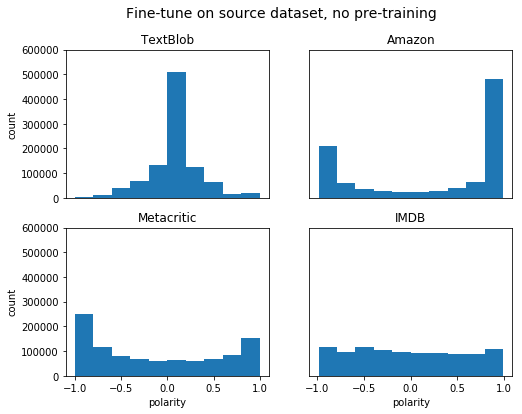

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(8,6))
fig.suptitle('Fine-tune on source dataset, no pre-training', fontsize=14)

axs[0][0].hist(df['textblob'])
axs[0][0].set_title('TextBlob')
axs[0][0].set_ylabel('count')
axs[0][0].set_ylim([0,600000])
axs[0][0].get_xaxis().set_visible(False)

axs[0][1].hist(df['amazon'])
axs[0][1].set_title('Amazon')
axs[0][1].set_ylim([0,600000])
axs[0][1].get_xaxis().set_visible(False)
axs[0][1].get_yaxis().set_visible(False)

axs[1][0].hist(df['meta'])
axs[1][0].set_title('Metacritic')
axs[1][0].set_xlabel('polarity')
axs[1][0].set_ylabel('count')
axs[1][0].set_ylim([0,600000])

axs[1][1].hist(df['imdb'])
axs[1][1].set_title('IMDB')
axs[1][1].set_xlabel('polarity')
axs[1][1].set_ylim([0,600000])
axs[1][1].get_yaxis().set_visible(False)

##### There may be a similar bipolar relation relationship between the text length and the prediction

In [30]:
df['n_words'] = df['text'].apply(lambda x: len(x.split()))
sample = df.sample(100000)

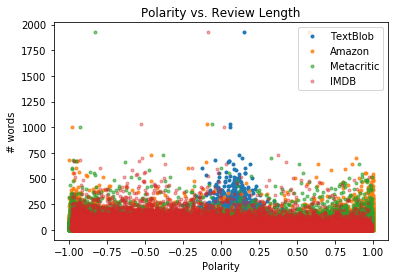

In [31]:
plt.plot(sample['textblob'], sample['n_words'], '.', label='TextBlob')
plt.plot(sample['amazon'], sample['n_words'], '.', alpha=0.8, label='Amazon')
plt.plot(sample['meta'], sample['n_words'], '.', alpha=0.6, label='Metacritic')
plt.plot(sample['imdb'], sample['n_words'], '.', alpha=0.4, label='IMDB')

plt.xlabel('Polarity')
plt.ylabel('# words')
plt.title("Polarity vs. Review Length")
plt.legend()

# Examples

In [37]:
pd.set_option('display.max_colwidth', -1)

##### Sentiment sorted by Amazon model prediction

In [38]:
sample.sort_values('amazon').drop(['n_chars','n_words'], axis=1)

,text,amazon,meta,imdb,textblob
313682,Wasted +600$ on 2k16 and the servers are closed now. Literally a waste of money. Fuck I’m an idiot.,-0.999220,-0.995786,-0.971193,-0.340000
742462,This looks horrible. Fonts and colors make no sense and you can't see the charge on any of your items,-0.999181,-0.995366,-0.980393,-1.000000
706193,"Game is horribly broken. If there is anyone thinking of buying, throw money in the bin = better profit.",-0.999152,-0.996571,-0.924369,-0.100000
847720,"comms dont work, the game is lagging , its pointless playing it. as bad as it was at launch, its now worse. AAA, full price, fucking joke",-0.999151,-0.994544,-0.979270,-0.333333
280653,Time spent trying to make money off skins=time not spent patching countless bugs. I understand they are not the same dev team but this game is trash.,-0.999112,-0.996390,-0.980747,-0.090000
206073,I’m so tired of hearing this. This game from launch till now has been a total buggy fucking embarrassment. Stop excusing corporate greed.,-0.999099,-0.995857,-0.973915,-0.280000
437039,This is the type of shit that has me losing faith in treyarch doing anything they say they will,-0.999096,-0.976875,-0.857264,-0.200000
632236,Exactly. Massive waste of time considering I’ve even tried reinstalling and get the same issue. Customer support are being useless too,-0.999094,-0.995694,-0.977737,-0.175000
467375,"Doesnt work, tried it twice in custom games and online, didnt help.",-0.999083,-0.981825,-0.558350,0.000000
445526,Full of bugs...,-0.999075,-0.976118,0.843467,0.350000


##### Compare Amazon model prediction with others

* There are situations that models disagree.

-- Amazon thinks it's negative while Metacricit/IMDB think it's positive: 320/100,000 examples

-- Amazon thinks it's positive while Metacritic/IMDB think it's negative: 4,544/100,000 examples (Amazon tends to pick up positive language)

In [72]:
idx = (sample['amazon'] < -0.8) & ((sample['meta']>0.8) | (sample['imdb'] > 0.8))
sample.loc[idx].sort_values('amazon').drop(['n_words','n_chars','textblob'],axis=1)

,text,amazon,meta,imdb
445526,Full of bugs...,-0.999075,-0.976118,0.843467
612191,Game is as broken as Treyarch's promises.,-0.998873,-0.989891,0.929170
353159,I dont enjoy it either,-0.996599,-0.986094,0.808328
863059,Ghosts. Infinite Warfare is so much better,-0.996478,-0.253522,0.852102
651838,It isn't free. We have already paid.,-0.995680,-0.987229,0.800663
609610,SMASHING,-0.994943,0.858520,0.032431
283169,Array is so loud I heard it in real life.,-0.994630,0.594947,0.907638
391862,The red lights dosnt show from every angle.,-0.993217,-0.524904,0.892735
504833,"Yea, most of the hate for this game and logic for it being the ""worst"" really stems from the hype everyone had going into this year. I was hoping for a game resembling bo2, and to say I was let down would be an understatement 😪",-0.992809,0.975115,-0.948652
465803,It’s really frustrating! I hope this gets looked at ASAP.,-0.992477,-0.935693,0.961293


In [73]:
idx2 = (sample['amazon'] > 0.8) & ((sample['meta']<-0.8) | (sample['imdb'] <- 0.8))
sample.loc[idx2].sort_values('amazon').drop(['n_words','n_chars','textblob'],axis=1)

,text,amazon,meta,imdb
9390,Honestly based off of how laggy he looked I was able to roughly guess his fps and that's what made me think they were tied together. He was running the game at 15-20 fps. I'll try to test with him later tonight if looking at the sky/ground makes him look smoother since it should increase fps.,0.800103,-0.829430,-0.110457
971534,Water is dirty af too u gotta be underwater to see people underwater lol,0.800162,-0.935402,-0.421271
20583,"Yeah there is, just don’t use them. I’ve had a bunch of high-ish round plays (40+) where I don’t use Gobblegums, specialist, repacking etc. Hell I’ve done a few where I don’t even packapunch or buy jugg (not as hard as it sounds on Ascension)",0.800283,-0.588690,-0.850517
465085,"Why don't you look at some video about this and stop talking out of your ass? According to your statement you are a P2W kinda person, that's a bit sad.",0.800487,-0.728323,-0.844554
51522,Is there no host migration?,0.800539,-0.863059,-0.250987
259465,the only thing i feel entitled to is not buying a game where headglitching is celebrated by the community as an essential game component.,0.800584,-0.990784,-0.497699
326367,I loooooooove treyarch zombies but they messed up with the map imo,0.800661,-0.275988,-0.852901
675374,when somebody loot youre Pot of gold :(,0.800708,-0.868660,0.115095
963808,https://twitter.com/JKap415/status/1054541758741176321?s=19 oh no not again. Kaps gonna have grey hair before 2019 if Vin keeps doing this,0.800821,-0.953052,-0.485704
767739,Yeah if you drop an attachment next to a bag and want to pick it up again you're gonna have a bad time.,0.801054,-0.508526,-0.864859


# TextBlob "false positives"

These are examples that Amazon BERT classified as relatively neutral (0 $\pm$ .1) ranked by TextBlob polarity. If we "trust" BERT's prediction, then we can view these as false positives. Some observations:

* Compared to TextBlob BERT is fairly insensitive to gamer slang (e.g., nasty, sick) and personal ad-hominem attacks
* There still is the length issue -- In some cases, short sentences with unambiguous sentiment fail to elicit high sentiment for BERT (e.g., "That was an annoying feature", "Imagine blackout at this time of night would be awesome.")

In [74]:
idx3 = (sample['amazon'] > -.1) & (sample['amazon'] < .1)
sample.loc[idx3].sort_values('textblob').drop(['n_chars','n_words'],axis=1)

,text,amazon,meta,imdb,textblob
372406,Check the ancient evil megathread.,0.000593,0.711361,-0.240353,-1.0000
690830,As in it's horribly fugly and I'd rather die than get it? Yuppp.,0.019662,-0.868296,-0.941576,-1.0000
620900,I kinda hope so ngl even if it whould be a horrible idea,0.088533,0.315067,-0.844959,-1.0000
558107,Nuketown is horrible for spawns and the sweatiest of the sweats play hardcore dom. No surprises.,0.000152,-0.868147,-0.535402,-1.0000
746165,"No you idiot, he meant prestigious. Dammit u/snypesalot I’m a Doctor, not a sharpa! /s",0.076670,-0.474422,-0.681399,-1.0000
766156,"I was just about to write this myself, got some nasty ptsd flashes.",-0.059801,0.237350,-0.845421,-1.0000
115987,dont understand why people grind for this terrible looking camo and then complain about it lmfao,-0.032475,-0.227555,-0.789884,-1.0000
66522,Jealousy is a cruel mistress...,0.017691,-0.553940,0.543141,-1.0000
417846,Scumps going to be disgusting,0.096494,-0.184646,-0.769173,-1.0000
605775,Shadows of evil over Moon that’s stupid,-0.061902,-0.231369,-0.662877,-0.9000


# TextBlob "false negatives"

We can do the inverse and look at TextBlob "false negatives" -- examples TetBlob classifies as reltaively neutral (0 $\pm$ .1) ranked by BERT polarity. If we "trust" BERT's prediction, these are high-sentiment cases TextBlob fails to uncover. Some observations:

* High emphasis on dollar value on negative end of the sentiment spectrum (likely due to Metacritic reviews emphasising whether a purchase was worth their money). TextBlob fails to uncover these cases because there aren't typically any sentiment-laden adjectives or they get averaged out across the comment.
* The positive end of the sentiment spectrum isn't strictly positive. Seems to be more rationalized positivity (stuff like "despite it's flaws, I like this game"). I suspect this may be due to the way Metacritic reviews are written -- users have to point out some flaws as a reviewer, but end up awarding a high score, which we use as a proxy for positive sentiment.

In [75]:
idx4 = (sample['textblob'] > -.1) & (sample['textblob'] < .1)
sample.loc[idx4].sort_values('amazon').drop(['n_chars','n_words'],axis=1)

,text,amazon,meta,imdb,textblob
280653,Time spent trying to make money off skins=time not spent patching countless bugs. I understand they are not the same dev team but this game is trash.,-0.999112,-0.996390,-0.980747,-0.090000
467375,"Doesnt work, tried it twice in custom games and online, didnt help.",-0.999083,-0.981825,-0.558350,0.000000
163687,Never going to do this. It would be indirectly insinuating a large portion of the game is pure garbage.,-0.999045,-0.984932,-0.976256,0.009524
411113,"Ridiculous that over 2 months after release there is still no league play in by far the most unbalanced MP experience. Control Mods are the worst things to come to multiplayer and Treyarch does nothing to implement the one playlist that is actually somewhat balanced and removes the ability to use them. Furthermore, I’d like to know why nothing has been addressed concerning multiplayer character outfit customization issues. It is completely unacceptable that people have purchased items wth real money that they can not use. I’m fairly certain refunds are in order. Countless players have reported their character outfit reverting to default every time a lobby is joined.",-0.999038,-0.988383,-0.899946,-0.024339
128135,Treyarch wants to do everything in its power to suck the fun out of this game.,-0.999018,-0.892778,-0.950937,0.033333
581522,"No one is happy, everyone has been shitting on the game since release. The game is a fucking joke and Treyarch have lost whatever good will they had.",-0.998999,-0.995093,-0.747003,0.020000
670930,"It’s not fun. This sub is a complete mess right now, with people posting the same things without using the search bar, just spam posts. You’re not making it any better. Your idea of ‘joking around’ is not appreciated.",-0.998982,-0.993116,-0.972634,0.065816
400719,I'm going to be honest with you. This was a very low quality shitpost. I'm disappointed.,-0.998963,-0.985504,-0.979095,-0.050000
144075,"I feel like a fuckin sucker for actually believing that they would make a good PC version this year. They lied through their fuckin teeth for months and said that this would be the year they actually support PC. But they lied. We were supposed to get PC only updates because PC is so different from console, but we haven’t. I can’t even play the game because their servers are so abysmal. I can’t believe I spent $60 on an online only game that has game breaking server issues... Its been 3 weeks since I’ve played because their full priced game is fucking broken. Thanks for lying and dicking down the PC community /u/TreyarchPC 🙃🙃🙃",-0.998920,-0.995693,-0.954194,-0.081597
594230,"1/5 of the ""playerbase"" can't even play, constant crashes and non existent servers except for usa and central europe yet treyarch is still mia",-0.998861,-0.993645,-0.772463,0.000000


# "Induced" sentiment for a given word
We can look at the average sentiment for every comment that contains a specific word, even if that word is not intrinsically polarizing. We can then compare the scores assigned by TextBlob (often $\mu=0$ unless the word *is* intrinsically polarizing) to BERT to look at negative and positive sentiment surrounding the word.

Fun words to try:
* microtransactions, mtx
* netcode, lag
* activision
* fortnite
* hate, love
* shit, lol

(see also top500 list below)

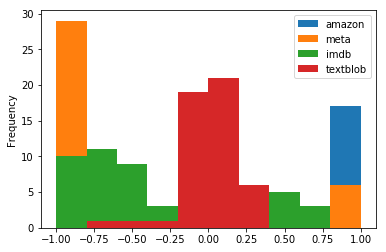

In [83]:
word = 'mtx'

sample.loc[sample['text'].apply(lambda x: word in x.lower().split()), 
           ['amazon', 'meta','imdb','textblob']].plot(kind='hist')

In [84]:
sample.loc[sample['text'].apply(lambda x: word in x.lower().split()), 
           ['amazon', 'meta','imdb','textblob']].mean()

amazon     -0.019673
meta       -0.434555
imdb       -0.344037
textblob    0.000983
dtype: float64

In [85]:
sample.loc[sample['text'].apply(lambda x: word in x.lower().split()), ['text', 'amazon', 'meta','imdb']].sort_values('amazon')

,text,amazon,meta,imdb
734165,"Not really helpful. We have had months to gather data sets. Dozens of youtubers have already done this. He spent the 100 for content to make money. That is the big favor done for us. We have known for over 3 years now that Treyarch has the most predatory MTX systems in the CoD franchise. There is no reason to believe that would change. They spent time revamping MTX, but cannot find the time to deliver a combat record.....promised in 2018. If you look at all the problems with BO4, none are related to microtransactions not working how they want.",-0.998463,-0.989082,-0.703769
90077,\#BoycottActivision. Activision’s monetization of these already paid games has gone too far. Unique weapons and gameplay-affecting content constrained to tier progressions or loot crates that can be bought outright for an advantage is unacceptable in a $60 game. Join the boycott and spread the word on social media. Don’t play CoD or spend a penny on this franchise until its MTX models are fit for these pay-to-play titles.,-0.997988,-0.996559,-0.816896
606280,"They don't bother me in that I don't care what other players have or what they want to spend their money on. What annoys me is the way Activision is just trying to constantly shove this crap down our throats. Or that a full-price game with a very expensive season pass has more microtransactions than most F2P games out there. Plus there was outrage about the pass before the game launched and apparently sales of said pass have not been very good. So what does Activision do to try and appease gamers? Nothing. Instead they add even more and overly aggressive MTX to the game in order to make up for lost revenue. I understand publishers put out these games in order to turn a profit, but the way Activision goes about it is so greasy. And when sales are down they make it even worse. All of that is what is turning me off of Black Ops 4 to be honest. But hey, if you want a bunny suit I'm not going to try and stop you. Just remember why it's in the game in the first place.",-0.993891,-0.993888,-0.967562
177300,"Boo fucking hoo. A company is making money on MTX that you do not need to buy and is not P2W. Skins do not matter. Reticles do not matter. There are still Reticles available via Kills ADS. As long as there are no Weapon Variants that provide free in-built perks or attachments available as MTXs (like the guns from IW); I will remain happy with the black market as it is (where I only ever have to look at my Operation progression, or what I am near earning).",-0.978516,-0.985547,-0.538721
209113,"No. A fully priced game with an expensive season pass should not need for lootboxes. And the fact that the implementation of the tier system is worse the Fortnite and the specialist skins are the shittiest excuse for character customisation I’ve ever seen is embarrassing. We should not have to choose between two evils, especially when people are paying $110 for an unpolished game. Ofc I see that large corporations such as Activision or EA will never give up MTX. So why not just do what BFV is doing and keep MTX to only skins that can be directly purchased, and no other BS. And also put a shred of effort into the specialist skins.",-0.978242,-0.966155,-0.952127
12433,"Obviously its only business but to market a game as competitive and then to lock things like talismans behind huge paywalls is ridiculous! I dont think they should remove MTX all together because theres absolutely no way in hell they ever will, it just doesnt make sense. But they should remove the ability to purchase nebula for real money, reduce the timer for classic elixers, and make the progression system more attainable for things like the tiered events",-0.974708,-0.986015,-0.938231
348829,"No. Stop defending a billion dollar company for cheaping out on their consumers. They already take advantage of us with their F2P MTX system (and blackops pass), but I guess it's too much to ask for a decent server tick rate. 

###### Ranking induced sentiment for top 500 most-common words
Interesting to see that there are a number of non-adjectives on the lower end of the spectrum surround Activision, money, paying, etc., consistent with observations of TextBlob "false negatives"

In [60]:
depunct = str.maketrans('', '', string.punctuation)
stop = set(stopwords.words('english'))
corpus = []

for text in sample['text']:
    corpus += [word for word in text.lower().translate(depunct).split() if word not in stop]
    
counts = Counter(corpus)
top500words = sorted(counts, key=counts.get)[::-1][:500]

In [64]:
# very inefficient code

top500polarity = {}
top500polarity_meta = {}

for word in top500words:
    top500polarity[word] = sample.loc[sample['text'].apply(lambda x: word in x.lower().split()), 
                                      'amazon'].mean()
    top500polarity_meta[word] = sample.loc[sample['text'].apply(lambda x: word in x.lower().split()), 
                                      'meta'].mean()

In [66]:
pd.DataFrame(list(top500polarity.items()), columns=['word', 'polarity']).sort_values('polarity')

,word,polarity
350,deleted,-0.568807
442,worst,-0.508503
356,activision,-0.417141
359,worse,-0.396201
397,servers,-0.352103
401,broken,-0.341729
88,treyarch,-0.267420
435,sucks,-0.242250
195,money,-0.228903
351,stupid,-0.218551


In [67]:
pd.DataFrame(list(top500polarity_meta.items()), columns=['word', 'polarity']).sort_values('polarity')

,word,polarity
356,activision,-0.768388
195,money,-0.713761
391,pay,-0.661160
397,servers,-0.603363
350,deleted,-0.591487
442,worst,-0.564702
360,lobby,-0.554876
399,reddit,-0.537266
435,sucks,-0.535581
359,worse,-0.530807
